In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import io
from skimage.util.dtype import dtype_range
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank

# Load an example image
img = io.imread('lena512gray.jpg')

In [8]:
'''
使用scikit-image完成全域直方圖等化
使用scikit-image完成局部直方圖等化
'''
# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
selem = disk(30)
img_eq = rank.equalize(img, selem=selem)

In [9]:
def plot_img_and_hist(image, axes, bins=256):
    """
    Plot an image along with its histogram and cumulative histogram.
    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf

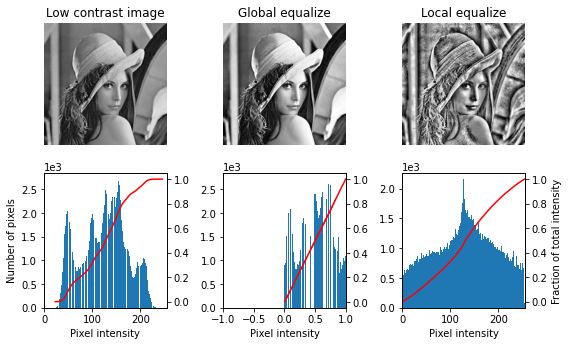

In [10]:
# Display results
#設定圖表大小
fig = plt.figure(figsize=(8, 5))
#建立陣列初始化為0
axes = np.zeros((2, 3), dtype=np.object)
#儲存各圖表區的位置
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)
#印出各圖片
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalize')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')

# prevent overlap of y-axis labels
fig.tight_layout()

<ipython-input-11-280b5351b84b>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show(plt.hist(img_eqbest.flatten(),bins=256))


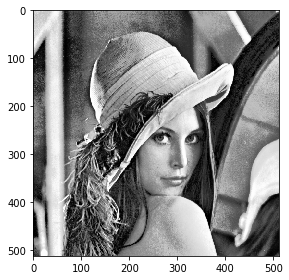

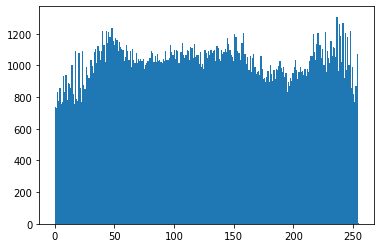

In [11]:
#修改局部直方圖等化的參數，找出最佳的結果
img_eqbest = rank.equalize(img, selem=disk(165))
io.imshow(img_eqbest)
f = plt.figure()
f.show(plt.hist(img_eqbest.flatten(),bins=256))

<ipython-input-12-69fdda65fdf1>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show(plt.hist(img_gloeq.flatten(),bins=256))


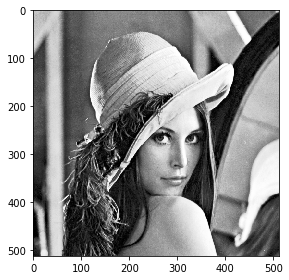

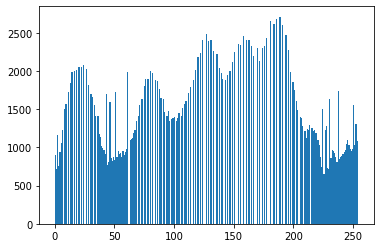

In [12]:
#不使用scikit-image完成全域直方圖等化
img_gloeq = np.empty_like(img)
img_gloeq = img
height,width = img_gloeq.shape

#用dictionary紀錄各數值的出現次數
appeartimes = {}
for i in  range(height):
    for j in range(width):
        if img_gloeq[i,j] not in appeartimes:
            appeartimes[img_gloeq[i,j]] = 1
        else:
            appeartimes[img_gloeq[i,j]] += 1

#再計算灰階值的累積分布函數（cdf）
cdf = []
cdf.append(0 if 0 not in appeartimes else appeartimes.get(0))
for i in range(1,256):
    if i in appeartimes:
        cdf.append(cdf[i-1] + appeartimes.get(i))
    else:
        cdf.append(cdf[i-1])
#找出最多的次數
cdf_max = max(cdf)
#找出最少的次數
for i in range(0,256):
    if cdf[i] > 0:
        cdf_min = cdf[i]
        break
#利用等化公式將各值擴張成0-255
for i in range(height):
    for j in range(width):
        img_gloeq[i][j] = ((cdf[img_gloeq[i][j]] - cdf_min)/(cdf_max-cdf_min))*255
#印出圖片和直方圖
io.imshow(img_gloeq,cmap='gray')
f = plt.figure()
f.show(plt.hist(img_gloeq.flatten(),bins=256))